In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [74]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
os.listdir('data_train')

['A',
 'B',
 'C',
 'D',
 'del',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [29]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [30]:
data = 'data_train'

In [31]:
os.listdir(data)

['A',
 'B',
 'C',
 'D',
 'del',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

The following code is not necessary because the data set is consistent with the phot sizes and extensions

In [32]:
for image_class in os.listdir(data):
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)


In [33]:
train_data = tf.keras.utils.image_dataset_from_directory('data_train', batch_size = 64)
validation_data = tf.keras.utils.image_dataset_from_directory("data_train")
class_names = train_data.class_names

Found 87000 files belonging to 29 classes.
Found 87000 files belonging to 29 classes.


In [36]:
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

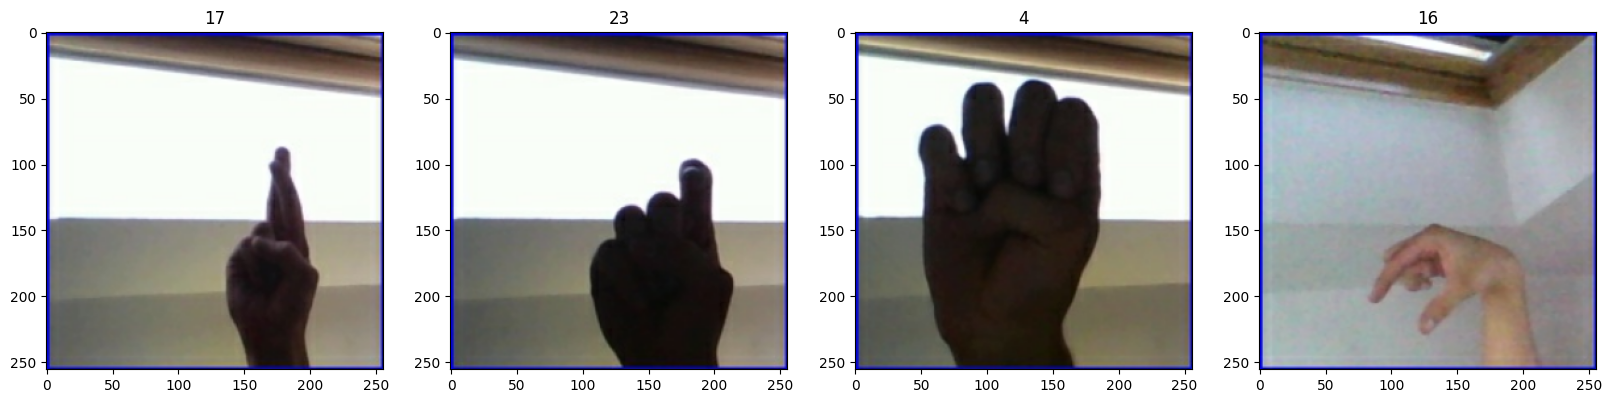

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

SCALE DATA  

In [39]:
train_data = train_data.map(lambda x,y: (x/255, y))
validation_data = validation_data.map(lambda x,y: (x/255, y))

In [40]:
data_iterator = train_data.as_numpy_iterator()

In [41]:
batch = data_iterator.next()

In [80]:
len(batch[0][1])

256

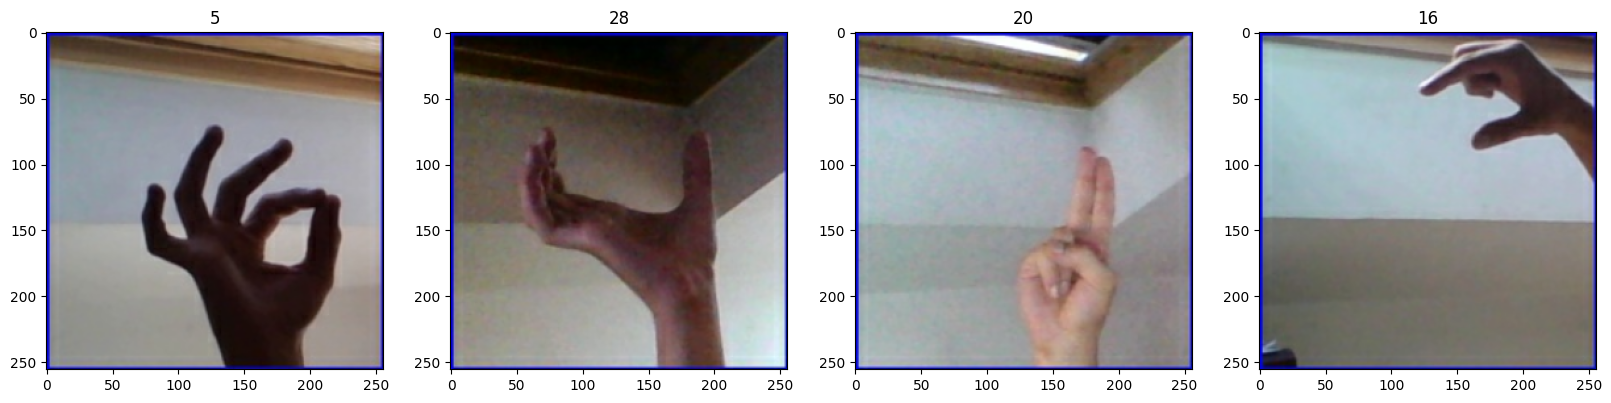

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

SPLIT DATA

In [46]:
training_size = int(len(train_data)*.7) + 1
validation_size = int(len(train_data)*.2)
testing_size = int(len(train_data)*.1)

In [57]:
train = train_data.take(training_size)
validation = train_data.skip(training_size).take(validation_size)
test = train_data.skip(training_size + validation_size).take(testing_size)

DEEP LEARNING MODEL

In [59]:

model = Sequential([
  layers.Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3), use_bias =True),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), 1, activation='relu', use_bias =True),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), 1, activation='relu', use_bias =True),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu', use_bias =True),
  layers.Dropout(0.2),
  layers.Dense(29, use_bias =True)
])

In [60]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [62]:
epochs=15
history = model.fit(train, validation_data=validation, epochs=epochs)

Epoch 1/15
952/952 [==============================] - 3045s 3s/step - loss: 1.0028 - accuracy: 0.6936 - val_loss: 0.1531 - val_accuracy: 0.9611
Epoch 2/15
952/952 [==============================] - 2910s 3s/step - loss: 0.1413 - accuracy: 0.9523 - val_loss: 0.0542 - val_accuracy: 0.9853
Epoch 3/15
952/952 [==============================] - 2943s 3s/step - loss: 0.0855 - accuracy: 0.9713 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 4/15
952/952 [==============================] - 2909s 3s/step - loss: 0.0613 - accuracy: 0.9799 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 5/15
952/952 [==============================] - 2963s 3s/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.0725 - val_accuracy: 0.9766
Epoch 6/15
952/952 [==============================] - 2910s 3s/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.0190 - val_accuracy: 0.9939
Epoch 7/15
952/952 [==============================] - 2992s 3s/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0130 - val_accuracy:

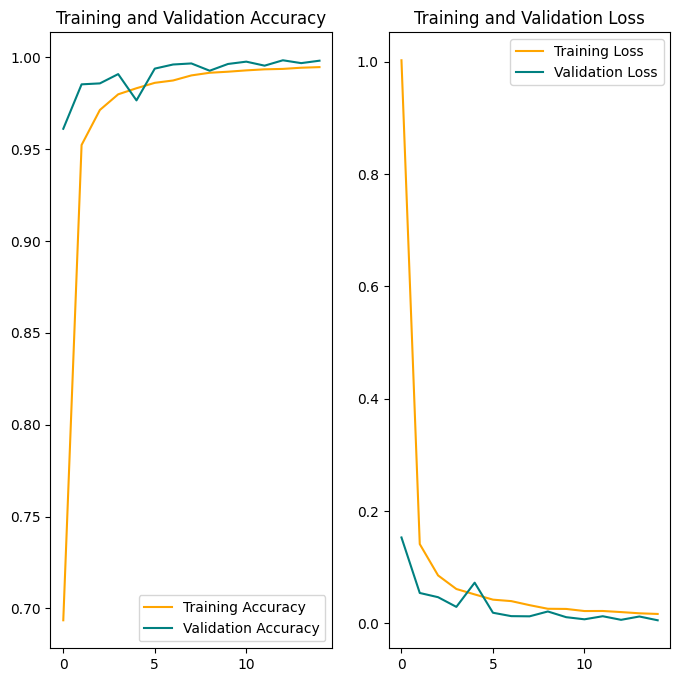

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot( acc, color='orange', label='Training Accuracy')
plt.plot( val_acc, color='teal', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, color='orange', label='Training Loss')
plt.plot(val_loss, color='teal', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
 X, y = batch
 prediction = model.predict(X)
len(X)

2/2 [==============================] - 1s 327ms/step


64

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    prediction = model.predict(X)
    pre.update_state(y, prediction)
    re.update_state(y, prediction)
    acc.update_state(y, prediction)

In [88]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:0.0


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image

In [ ]:
test_loss, test_acc = model.evaluate(train_data)